# Loan prediction analysis

Predict the customers that are likely to get loans approved

## Libraries and loading data

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
test =  pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
test_original = test.copy()
train_original = train.copy()

## EDA

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.shape

(614, 13)

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
test.shape

(367, 12)

In [9]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### univariate analysis

#### Target varaible

In [10]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

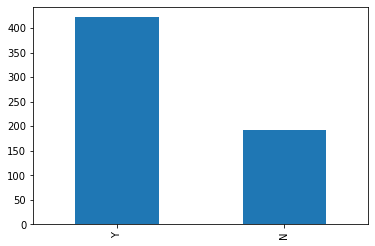

In [12]:
train.Loan_Status.value_counts().plot.bar()

~69% of the loan applications were approved and ~31% was not approved.

#### Categorical variable

features has categories

<AxesSubplot:title={'center':'Gender'}>

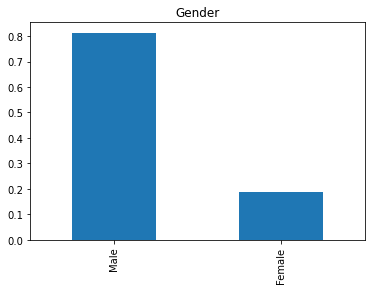

In [13]:
train.Gender.value_counts(normalize=True).plot.bar(title='Gender')

80% of the loan applicants were ale while 20% were female

<AxesSubplot:title={'center':'Married'}>

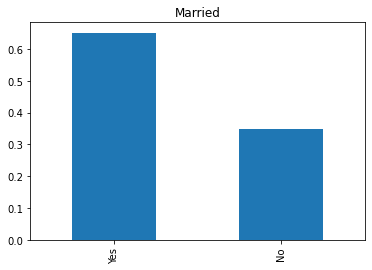

In [14]:
train.Married.value_counts(normalize=True).plot.bar(title='Married')

~65% of the applicants are married and ~ 35% are not

<AxesSubplot:title={'center':'Self Employed'}>

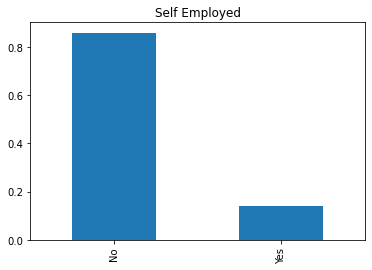

In [15]:
train.Self_Employed.value_counts(normalize=True).plot.bar(title='Self Employed')

~15% of the loan applicants are Self employed and ~85% are employed

<AxesSubplot:title={'center':'Credit History'}>

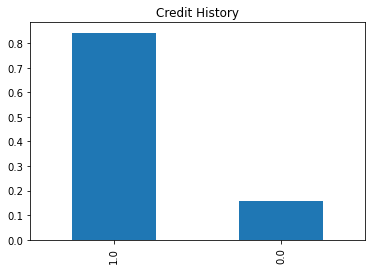

In [16]:
train.Credit_History.value_counts(normalize=True).plot.bar(title='Credit History')

~85% have repaid loan while ~15% not paid the loan

#### Ordinal variable

Variables in thr categorical features havin some order involved

<AxesSubplot:title={'center':'Dependents'}>

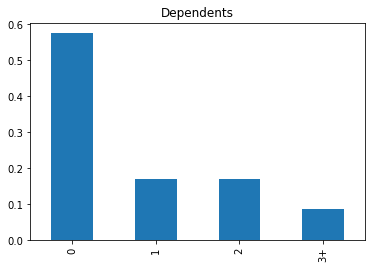

In [17]:
train.Dependents.value_counts(normalize=True).plot.bar(title='Dependents')

~ 58% of the applicants have no dependents while ~42% have more than one dependents.  

<AxesSubplot:title={'center':'Education'}>

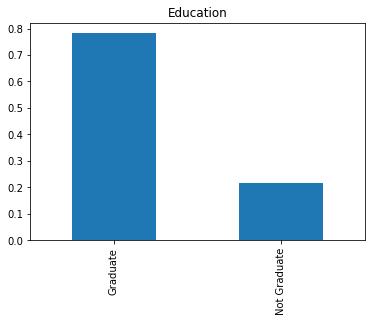

In [18]:
train.Education.value_counts(normalize=True).plot.bar(title='Education')

~75% have graduated while 25% have not graduated

<AxesSubplot:title={'center':'Property Area'}>

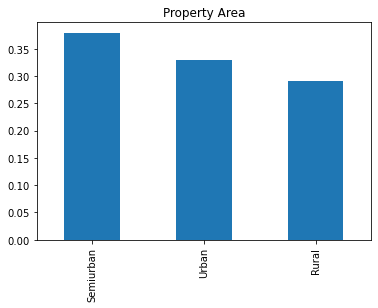

In [19]:
train.Property_Area.value_counts(normalize=True).plot.bar(title='Property Area')

most of the loan applicants are from semi urban areas

#### Numerical variable

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

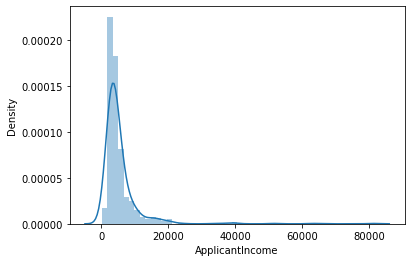

In [20]:
sns.distplot(train.ApplicantIncome)

<AxesSubplot:>

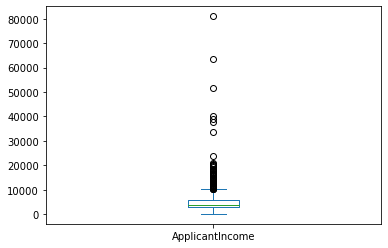

In [21]:
train.ApplicantIncome.plot.box()

income is distributed according to education and etc.

Text(0.5, 0.98, '')

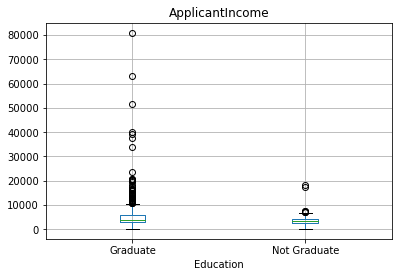

In [22]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

there are many high income earners when you area a graduate which consist of most of the outliers.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

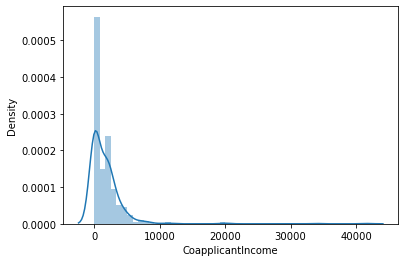

In [23]:
sns.distplot(train.CoapplicantIncome)

<AxesSubplot:>

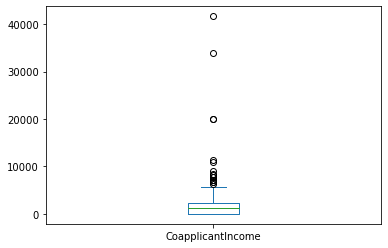

In [24]:
train.CoapplicantIncome.plot.box()

the coaplicant income is not normally distibuted.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

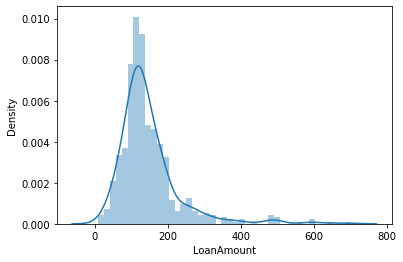

In [25]:
sns.distplot(train.LoanAmount)

<AxesSubplot:>

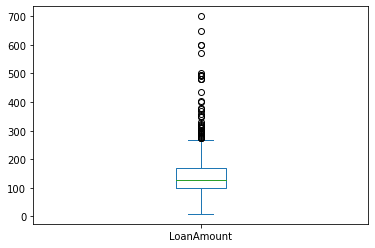

In [26]:
train.LoanAmount.plot.box()

the loan aaaaaamount is fairly normally distributed.

### Bivariate analysis

It's likely for an applicant to have their loan approved if:
- Applicants with high income 
- applicants that have reapid their loans
- the loan amount is less.
- the time for the loan to be paid.

#### Categorical varaibles vs Target varaible.

finding the relationship of the categorical 

<AxesSubplot:xlabel='Gender'>

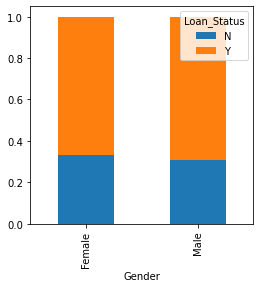

In [27]:
Gender = pd.crosstab(train.Gender,train.Loan_Status)
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

both male and female have an seemingly equal chance to et loan approvals.

<AxesSubplot:xlabel='Married'>

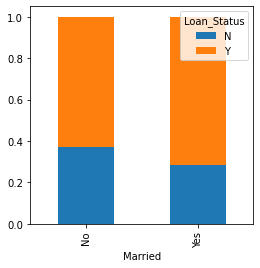

In [28]:
Married = pd.crosstab(train.Married,train.Loan_Status)
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

married applicants are highly likely to have loans approved unlike single applicants.

<AxesSubplot:xlabel='Dependents'>

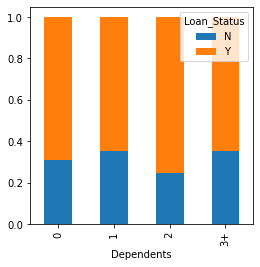

In [29]:
Dependents = pd.crosstab(train.Dependents,train.Loan_Status)
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Applicants with 2 dependents are likely to have their loans approved.

<AxesSubplot:xlabel='Education'>

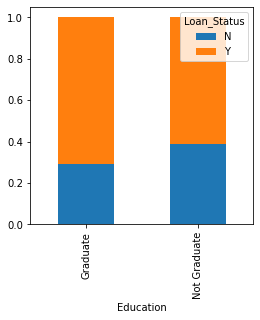

In [30]:
Education = pd.crosstab(train.Education,train.Loan_Status)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Applicant who have graduated are likely to get loans approved.

<AxesSubplot:xlabel='Self_Employed'>

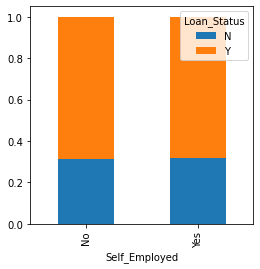

In [31]:
Self_employment = pd.crosstab(train.Self_Employed,train.Loan_Status)
Self_employment.div(Self_employment.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Self employment is not a factor that determines loan approval.

<AxesSubplot:xlabel='Credit_History'>

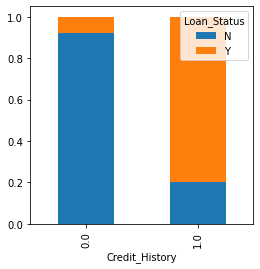

In [32]:
Cred_histo = pd.crosstab(train.Credit_History,train.Loan_Status)
Cred_histo.div(Cred_histo.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Appicants who have paid their loans are more likely to have loans apporved

<AxesSubplot:xlabel='Property_Area'>

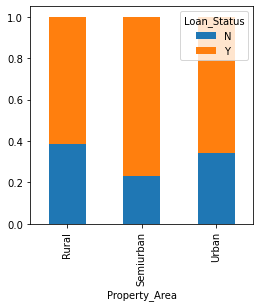

In [33]:
Property = pd.crosstab(train.Property_Area,train.Loan_Status)
Property.div(Property.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Applicants who live in the semiurban areas are likely to have loans approved.

#### Numerical variable vs Target Variable

In [34]:
bins = [0,2500,4000,6000,8100] 
group= ['Low','Average','High','Very High']
train.Income_bin = pd.cut(train.ApplicantIncome,bins,labels= group)

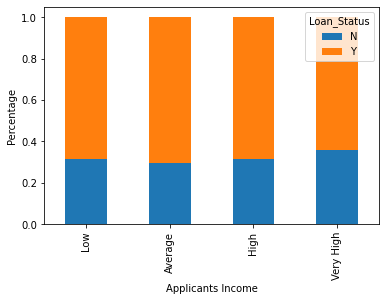

In [35]:
Income_bin = pd.crosstab(train.Income_bin,train.Loan_Status)
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True)
plt.xlabel('Applicants Income')
p = plt.ylabel('Percentage')

Applicants income doesnt affect approval for loans

In [36]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train.CoapplicantIncome_bin = pd.cut(train.CoapplicantIncome, bins , labels=group)

Text(0, 0.5, 'Percentage')

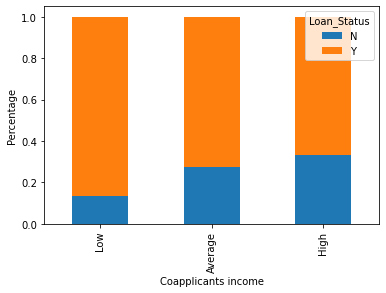

In [37]:
CoapplicantIncome_bin = pd.crosstab(train.CoapplicantIncome_bin,train.Loan_Status)
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Coapplicants income')
plt.ylabel('Percentage')

Coaaplicants with low income have a high chance for loan approval which may give wrong visualisions since some applicants dont have any coaaplicants hence we have to combine an applicants inacome with the coapplicants to get a better visualisation about loan approvals.

In [38]:
train.Total_income = train.ApplicantIncome + train.CoapplicantIncome

bins = [0,2500,4000,6000,81000]
group = ['low','average','high','very high']

train.TotalIncome_bins = pd.cut(train.Total_income,bins , labels = group)

Text(0, 0.5, 'Percentage')

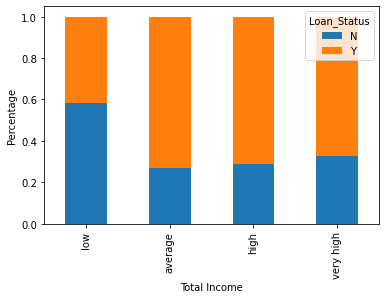

In [39]:
TotalIncome_bins = pd.crosstab(train.TotalIncome_bins,train.Loan_Status)
TotalIncome_bins.div(TotalIncome_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked= True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Applicants with average income have highly likelyhood for their loans to be approved.

In [40]:
bins = [0,100,200,700]
group=['Low','Average','High']

train.LoanAmount_bin = pd.cut(train.LoanAmount,bins, labels = group)

Text(0, 0.5, 'Percentage')

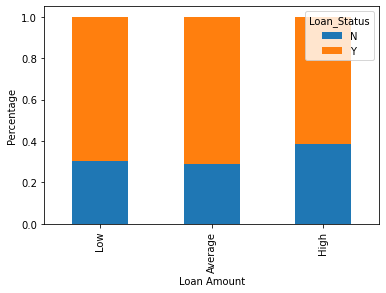

In [41]:
LoanAmount_bin = pd.crosstab(train.LoanAmount_bin,train.Loan_Status)
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

Low and average loan amount is highly likely to be approved.

In [42]:
train.Dependents.replace('3+',3,inplace=True)
test.Dependents.replace('3+',3,inplace=True)

In [43]:
train.Loan_Status.replace('N',0, inplace=True)
train.Loan_Status.replace('Y',1, inplace=True)

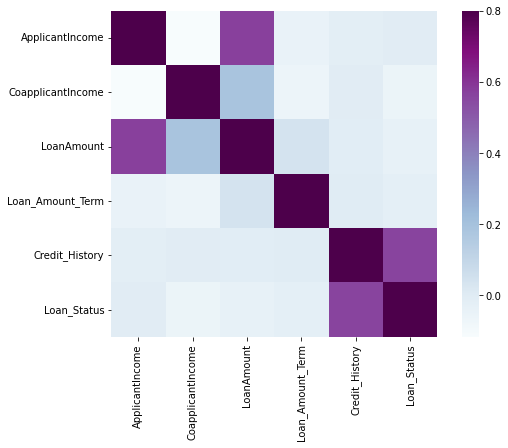

In [44]:
matrix = train.corr() 
ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix , vmax = .8, square= True , cmap = 'BuPu');

## Missing values and outliers

In [45]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

numerical variables

In [46]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0], inplace= True)
train.LoanAmount.fillna(train.LoanAmount.median(),inplace = True)

In [47]:
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0], inplace= True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace = True)

catergorical varaibles

In [48]:
train.Gender.fillna(train.Gender.mode()[0], inplace= True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace= True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace= True)
train.Credit_History.fillna(train.Credit_History.mode()[0] ,inplace=True)


In [49]:
test.Gender.fillna(test.Gender.mode()[0], inplace= True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace= True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0], inplace= True)
test.Credit_History.fillna(test.Credit_History.mode()[0] ,inplace=True)


outliers

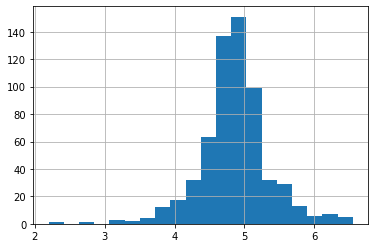

In [50]:
train.LoanAmount_log = np.log(train.LoanAmount)
train.LoanAmount_log.hist(bins=20)
test.LoanAmount_log = np.log(test.LoanAmount)

## Modelling

### Linear regression

In [51]:
train = train.drop('Loan_ID' , axis = 1)
test = test.drop('Loan_ID' , axis = 1)

In [52]:
y = train.Loan_Status
x =  train.drop('Loan_Status' , 1)

pd.get_dummies : convert variable into dummy/indicator variables.

In [53]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

.train_test_split() : divides our train datset into train and validate dataset

In [54]:
test.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [55]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [56]:
x_train, x_cv , y_train , y_cv = train_test_split(x , y , test_size = 0.3 )

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [58]:
pred_test = model.predict(test)

In [59]:
Submission = pd.read_csv('sample_submission.csv')

In [60]:
Submission.Loan_Status = pred_test

In [61]:
Submission.Loan_ID = test_original.Loan_ID

In [62]:
Submission.Loan_Status.replace(0 , 'N', inplace = True)
Submission.Loan_Status.replace(1 , 'Y' , inplace = True)

In [63]:
pd.DataFrame(Submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv',index = False)

## Logistic regression using stratified k-folds cross validation

In [71]:
i = 1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x , y):
    print('/n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

model = LogisticRegression(random_state=1)
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)

print('accuracy_score',score)

i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]

/n 1 of kfold 5
/n 1 of kfold 5
/n 1 of kfold 5
/n 1 of kfold 5
/n 1 of kfold 5
accuracy_score 0.8032786885245902


In [74]:
fpr , tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize= (12.8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Posistive Rate')
plt.legend(loc=4)
plt.show()

TypeError: Value after * must be an iterable, not float